In [1]:
import spyx
import spyx.nn as snn

import jax
import jax.numpy as jnp
import numpy as np

import nir

In [2]:
isis = [
    6, 15, 4, 3, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 
    0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 14
]
d1 = list(np.concatenate([isi*[0]+[1] for isi in isis]))[:100]
d = jnp.array([[e] + 9*[0] for e in d1], dtype=jnp.uint8).reshape(1, -1)

In [3]:
data = jnp.expand_dims(d, -1)

In [4]:
data.shape

(1, 1000, 1)

In [5]:
nir_net = nir.read("./lif_norse.nir")

In [6]:
nir_net.nodes

{'0': Affine(weight=array([[1.]], dtype=float32), bias=array([0.], dtype=float32)),
 '1': LIF(tau=array([0.0025], dtype=float32), r=array([1.], dtype=float32), v_leak=array([0.], dtype=float32), v_threshold=array([0.1], dtype=float32)),
 'input': Input(input_type={'input': array([1])}),
 'output': Output(output_type={'output': array([1])})}

In [7]:
SNN, params = spyx.nir.from_nir(nir_net, data.astype(jnp.float32), dt=1e-4, return_all_states=True)
params

{'linear': {'w': Array([[0.04]], dtype=float32),
  'b': Array([0.], dtype=float32)},
 'LIF': {'beta': array([0.96], dtype=float32)}}

In [8]:
spikes, voltage_trace = SNN.apply(params, data)

In [9]:
voltage_trace[0].flatten()[60:70]

Array([0.04      , 0.0384    , 0.036864  , 0.03538944, 0.03397386,
       0.03261491, 0.03131031, 0.0300579 , 0.02885558, 0.02770136],      dtype=float32)

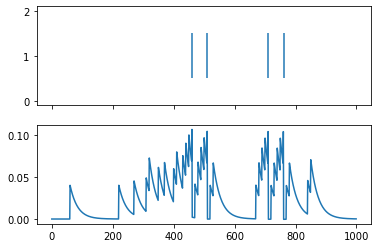

In [10]:
import matplotlib.pyplot as plt
spk, mem = spikes.flatten(), voltage_trace[0].flatten()

fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].eventplot(np.where(spk == 1))
axs[1].plot(mem)
plt.show();

In [11]:
with open(f'lif_spyx.csv', 'w') as fw:
    for idx in range(d.shape[1]):
        fw.write(f'{d[0,idx]},{mem[idx]},{spk[idx]}\n')

In [13]:
spyx.nir.to_nir(params, data.shape, (1,), dt=1e-4)

NIRGraph(nodes={'input': Input(input_type={'input': array([   1, 1000,    1])}), 'output': Output(output_type={'output': array([1])}), 'linear': Affine(weight=array([[0.04]], dtype=float32), bias=array([0.], dtype=float32)), 'LIF': LIF(tau=array([0.0025], dtype=float32), r=array([0.96], dtype=float32), v_leak=array([0.], dtype=float32), v_threshold=array([1.], dtype=float32))}, edges=[('input', 'linear'), ('linear', 'LIF'), ('LIF', 'output')])